In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import seaborn as sns
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Carga el archivo Excel
from google.colab import drive
drive.mount('/content/drive')

# Cargar el archivo CSV del dataset
df = pd.read_csv('/content/drive/My Drive/players_21.csv')

# Seleccionar las columnas de interés: 'overall', 'potential', 'skill_moves' y 'value_eur'
df = df[['overall', 'potential', 'skill_moves', 'value_eur']]

# Eliminar filas con valores nulos
df = df.dropna()

# Revisar las primeras filas del dataset para asegurarse que los datos están limpios
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    overall  potential  skill_moves   value_eur
40     87.0       87.0          1.0  34000000.0
42     87.0       87.0          3.0  38000000.0
54     86.0       86.0          1.0  28500000.0
57     86.0       86.0          3.0  32000000.0
60     86.0       86.0          3.0  38000000.0


In [ ]:
# Valores de X e Y
x = df["overall"].sum()
y = df["value_eur"].sum()

# Sumatoria de la multiplicación entre rendimiento general y valor de mercado
sumPor = (df["overall"] * df["value_eur"]).sum()

# Longitud de la tabla
n = len(df)

# Cálculo de Sxy
Sxy = sumPor - (x * y) / n
print("Sxy: " + str(Sxy))

# Cálculo de Sxx
Sxx = (df["overall"] ** 2).sum() - (x**2) / n
print("Sxx: " + str(Sxx))

# Cálculo de Syy
Syy = (df["value_eur"] ** 2).sum() - (y**2) / n
print("Syy: " + str(Syy))

# Cálculo de la pendiente (Estimador B1)
B1 = Sxy / Sxx
print("Pendiente (B1): " + str(B1))

# Cálculo de la ordenada al origen (Estimador B0)
B0 = y / n - B1 * x / n
print("Ordenada al origen (B0): " + str(B0))

# Cálculo de Ssr
Ssr = Syy - B1 * Sxy
print("Suma de cuadrados debido a la regresión (SCR): " + str(Ssr))

# Cálculo de R2
R2 = 1 - Ssr / Syy
print("Coeficiente de determinación (R2): " + str(R2))

# Cálculo de r
r = Sxy / ((Sxx * Syy) ** 0.5)
print("Correlación (r): " + str(r))

# Cálculo de la varianza
o2 = Ssr / (n - 2)
print("Varianza (o^2): " + str(o2))

# Cálculo de la desviacion estandar
o = o2 ** 0.5
print("Desviación estandar (o): " + str(o))

Sxy: 100975401177.43066
Sxx: 390058.3019023016
Syy: 6.772300649874061e+16
Pendiente (B1): 258872.58567495405
Ordenada al origen (B0): -15153844.420762697
Suma de cuadrados debido a la regresión (SCR): 4.158324330637333e+16
Coeficiente de determinación (R2): 0.3859805484692027
Correlación (r): 0.6212733283098533
Varianza (o^2): 4884101868260.903
Desviación estandar (o): 2210000.422683422


Coeficiente de regresión B0 (intercepto): -15153844.420762602
Coeficiente de regresión B1 (pendiente): 258872.5856749532
Coeficiente de determinación R²: 0.3859805484692036
Correlación entre overall y value_eur: 0.6212733283098527


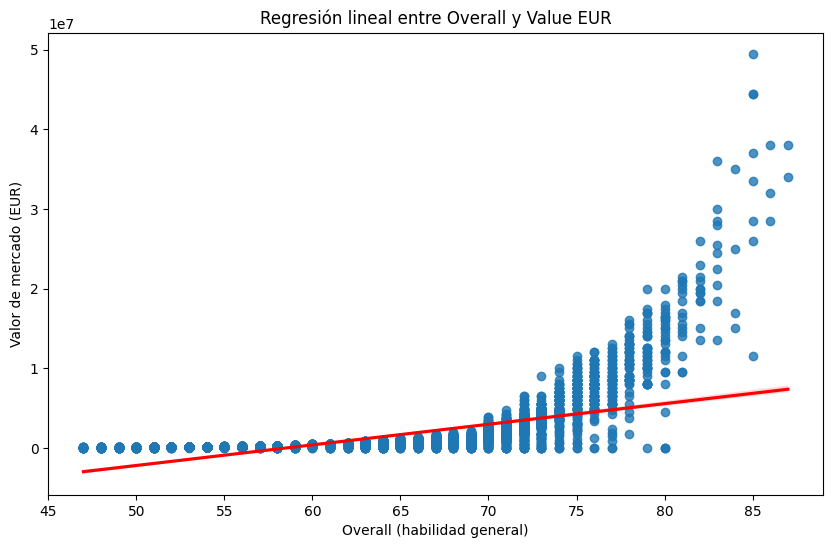

In [ ]:
# Definir las variables
X = df['overall']
y = df['value_eur']

# Agregar una constante a la variable independiente
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Obtener los coeficientes
B0, B1 = model.params

# Calcular el coeficiente de determinación
r_squared = model.rsquared

# Calcular la correlación
correlation = np.corrcoef(df['overall'], df['value_eur'])[0, 1]

# Resultados
print(f"Coeficiente de regresión B0 (intercepto): {B0}")
print(f"Coeficiente de regresión B1 (pendiente): {B1}")
print(f"Coeficiente de determinación R²: {r_squared}")
print(f"Correlación entre overall y value_eur: {correlation}")

# Graficar los datos y la línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='overall', y='value_eur', data=df, line_kws={"color": "red"})
plt.title('Regresión lineal entre Overall y Value EUR')
plt.xlabel('Overall (habilidad general)')
plt.ylabel('Valor de mercado (EUR)')
plt.show()

In [ ]:
# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = df[['overall']]  # Rendimiento general
y = df['value_eur']  # Valor de mercado

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Hacer predicciones con el modelo
predictions = model.predict(X)

# Calcular el Error Cuadrático Medio (ECM)
mse = np.mean((predictions - y) ** 2)

# Resultados
print(f"Error Cuadrático Medio (ECM): {mse}")


Error Cuadrático Medio (ECM): 4883126613469.245


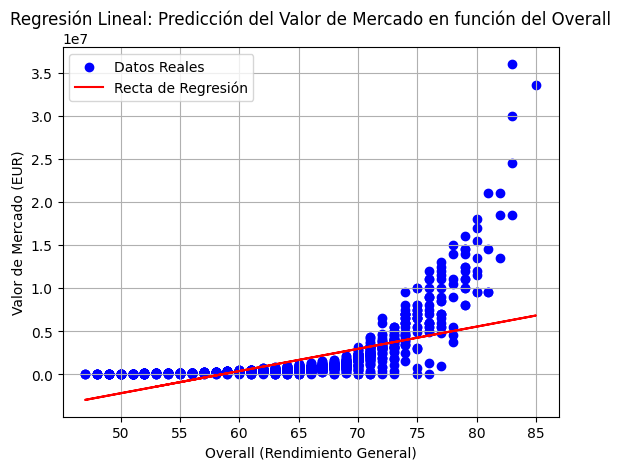

In [ ]:
# Graficar los datos reales y las predicciones
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', label='Recta de Regresión')
plt.xlabel('Overall (Rendimiento General)')
plt.ylabel('Valor de Mercado (EUR)')
plt.title('Regresión Lineal: Predicción del Valor de Mercado en función del Overall')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Valores de X e Y
x = df["potential"].sum()
y = df["value_eur"].sum()

# Sumatoria de la multiplicación entre potencial y valor de mercado
sumPor = (df["potential"] * df["value_eur"]).sum()

# Longitud de la tabla
n = len(df)

# Cálculo de Sxy
Sxy = sumPor - (x * y) / n
print("Sxy: " + str(Sxy))

# Cálculo de Sxx
Sxx = (df["potential"] ** 2).sum() - (x**2) / n
print("Sxx: " + str(Sxx))

# Cálculo de Syy
Syy = (df["value_eur"] ** 2).sum() - (y**2) / n
print("Syy: " + str(Syy))

# Cálculo de la pendiente (Estimador B1)
B1 = Sxy / Sxx
print("Pendiente (B1): " + str(B1))

# Cálculo de la ordenada al origen (Estimador B0)
B0 = y / n - B1 * x / n
print("Ordenada al origen (B0): " + str(B0))

# Cálculo de Ssr
Ssr = Syy - B1 * Sxy
print("Suma de cuadrados debido a la regresión (SCR): " + str(Ssr))

# Cálculo de R2
R2 = 1 - Ssr / Syy
print("Coeficiente de dterminación (R2): " + str(R2))

# Cálculo de r
r = Sxy / ((Sxx * Syy) ** 0.5)
print("Correlación (r): " + str(r))

# Cálculo de la varianza
o2 = Ssr / (n - 2)
print("Varianza (o2): " + str(o2))

# Cálculo de la desviación estándar
o = o2 ** 0.5
print("Desviación estándar (o): " + str(o))

Sxy: 74153076831.96338
Sxx: 284267.14736966044
Syy: 6.772300649874061e+16
Pendiente (B1): 260857.0055249292
Ordenada al origen (B0): -16976037.457591206
Suma de cuadrados debido a la regresión (SCR): 4.837965692589464e+16
Coeficiente de dterminación (R2): 0.28562449561665104
Correlación (r): 0.5344384862794325
Varianza (o2): 5682365154556.57
Desviación estándar (o): 2383771.20432238


Coeficiente de regresión B0 (intercepto): -16976037.45759145
Coeficiente de regresión B1 (pendiente): 260857.00552493273
Coeficiente de determinación R²: 0.28562449561665393
Correlación entre potencial y value_eur: 0.5344384862794347


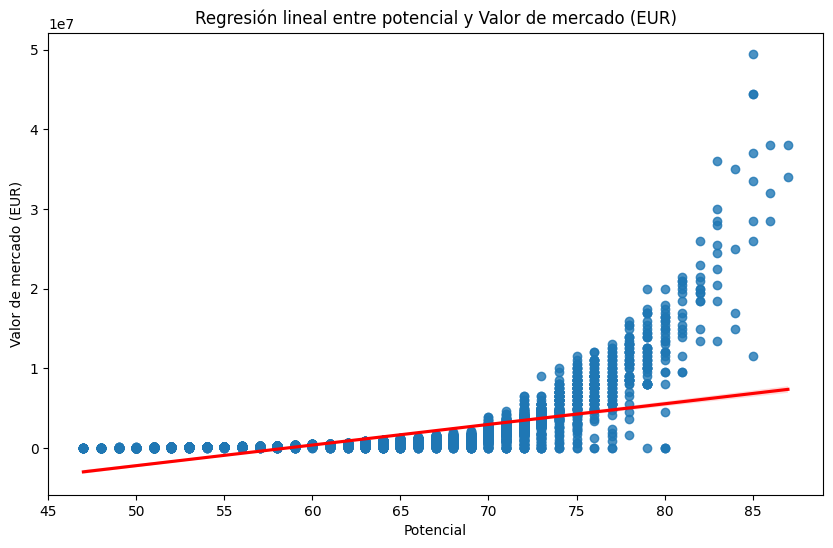

In [ ]:
# Definir las variables
X = df['potential']
y = df['value_eur']

# Agregar una constante a la variable independiente
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Obtener los coeficientes
B0, B1 = model.params

# Calcular el coeficiente de determinación
r_squared = model.rsquared

# Calcular la correlación
correlation = np.corrcoef(df['potential'], df['value_eur'])[0, 1]

# Resultados
print(f"Coeficiente de regresión B0 (intercepto): {B0}")
print(f"Coeficiente de regresión B1 (pendiente): {B1}")
print(f"Coeficiente de determinación R²: {r_squared}")
print(f"Correlación entre potencial y value_eur: {correlation}")

# Graficar los datos y la línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='overall', y='value_eur', data=df, line_kws={"color": "red"})
plt.title('Regresión lineal entre potencial y Valor de mercado (EUR)')
plt.xlabel('Potencial')
plt.ylabel('Valor de mercado (EUR)')
plt.show()

In [ ]:
# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = df[['potential']]  # Potencial del jugador
y = df['value_eur']  # Valor de mercado

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Hacer predicciones con el modelo
predictions = model.predict(X)

# Calcular el Error Cuadrático Medio (ECM)
mse = np.mean((predictions - y) ** 2)

# Resultados
print(f"Error Cuadrático Medio (ECM): {mse}")

Error Cuadrático Medio (ECM): 5682150827771.796


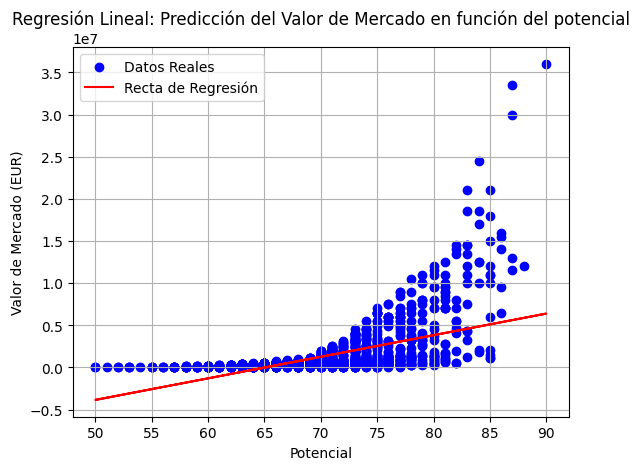

In [ ]:
# Graficar los datos reales y las predicciones
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', label='Recta de Regresión')
plt.xlabel('Potencial')
plt.ylabel('Valor de Mercado (EUR)')
plt.title('Regresión Lineal: Predicción del Valor de Mercado en función del potencial')
plt.legend()
plt.grid(True)
plt.show()

Coeficiente de regresión B0 (intercepto): 6012.947405202848
Coeficiente de regresión B1 (pendiente): 623533.6430860787
Coeficiente de determinación R²: 0.02178111050548548
Correlación entre skill_moves y value_eur: 0.14758424883938628


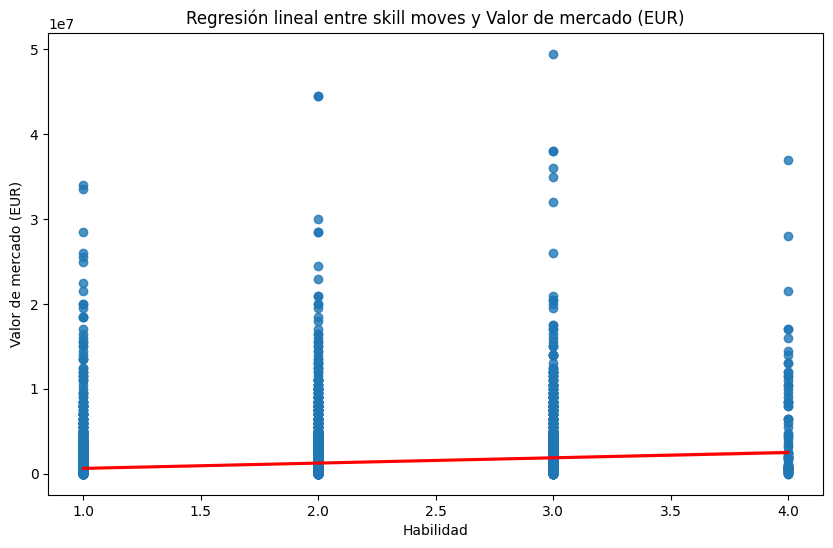

In [ ]:
# Definir las variables
X = df['skill_moves']
y = df['value_eur']

# Agregar una constante a la variable independiente
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Obtener los coeficientes
B0, B1 = model.params

# Calcular el coeficiente de determinación
r_squared = model.rsquared

# Calcular la correlación
correlation = np.corrcoef(df['skill_moves'], df['value_eur'])[0, 1]

# Resultados
print(f"Coeficiente de regresión B0 (intercepto): {B0}")
print(f"Coeficiente de regresión B1 (pendiente): {B1}")
print(f"Coeficiente de determinación R²: {r_squared}")
print(f"Correlación entre skill_moves y value_eur: {correlation}")

# Graficar los datos y la línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='skill_moves', y='value_eur', data=df, line_kws={"color": "red"})
plt.title('Regresión lineal entre skill moves y Valor de mercado (EUR)')
plt.xlabel('Habilidad')
plt.ylabel('Valor de mercado (EUR)')
plt.show()

In [ ]:
# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = df[['skill_moves']]  # Habilidad del jugador
y = df['value_eur']  # Valor de mercado

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Hacer predicciones con el modelo
predictions = model.predict(X)

# Calcular el Error Cuadrático Medio (ECM)
mse = np.mean((predictions - y) ** 2)

# Resultados
print(f"Error Cuadrático Medio (ECM): {mse}")

Error Cuadrático Medio (ECM): 7781657839037.506


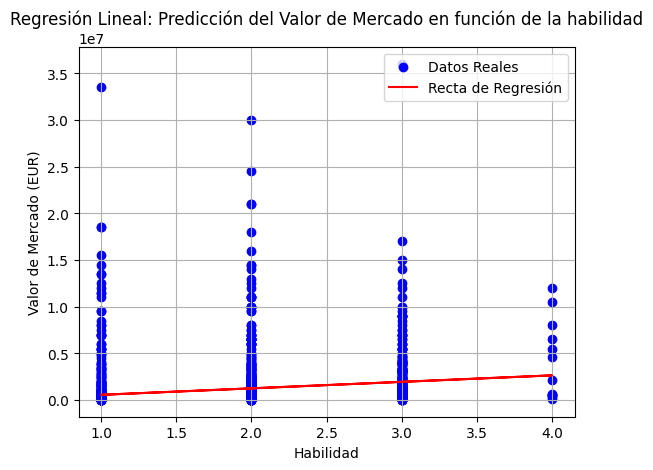

In [ ]:
# Graficar los datos reales y las predicciones
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', label='Recta de Regresión')
plt.xlabel('Habilidad')
plt.ylabel('Valor de Mercado (EUR)')
plt.title('Regresión Lineal: Predicción del Valor de Mercado en función de la habilidad')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = df[['skill_moves']]  # Potencial del jugador
y = df['value_eur']  # Valor de mercado

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

In [ ]:
# Valores de X e Y
x = df["skill_moves"].sum()
y = df["value_eur"].sum()

# Sumatoria de la multiplicacion entre movimientos y valor de mercado
sumPor = (df["skill_moves"] * df["value_eur"]).sum()

# Longitud de la tabla
n = len(df)

# Cálculo de Sxy
Sxy = sumPor - (x * y) / n
print("Sxy: " + str(Sxy))

# Cálculo de Sxx
Sxx = (df["skill_moves"] ** 2).sum() - (x**2) / n
print("Sxx: " + str(Sxx))

# Cálculo de Syy
Syy = (df["value_eur"] ** 2).sum() - (y**2) / n
print("Syy: " + str(Syy))

# Cálculo de la pendiente (Estimador B1)
B1 = Sxy / Sxx
print("Pendiente (B1): " + str(B1))

# Cálculo de la ordenada al origen (Estimador B0)
B0 = y / n - B1 * x / n
print("Ordenada al origen (B0): " + str(B0))

# Cálculo de Ssr
Ssr = Syy - B1 * Sxy
print("Suma de cuadrados debido a la regresión (SCR): " + str(Ssr))

# Cálculo de R2
R2 = 1 - Ssr / Syy
print("Coeficiente de determinación (R2): " + str(R2))

# Cálculo de r
r = Sxy / ((Sxx * Syy) ** 0.5)
print("Correlación (r): " + str(r))

# Cálculo de la varianza
o2 = Ssr / (n - 2)
print("Varianza (o2): " + str(o2))

# Cálculo de la desviación estándar
o = o2 ** 0.5
print("Desviación estándar: (o): " + str(o))

Sxy: 2365681955.8478165
Sxx: 3793.992484734619
Syy: 6.772300649874061e+16
Pendiente (B1): 623533.643086088
Ordenada al origen (B0): 6012.947405171348
Suma de cuadrados debido a la regresión (SCR): 6.62479242104278e+16
Coeficiente de determinación (R2): 0.021781110505485923
Correlación (r): 0.14758424883938642
Varianza (o2): 7781057576982.358
Desviación estándar: (o): 2789454.709613038


Regresión Lineal Múltiple

{'sumX1': 539711.0, 'sumX2': 595093.0, 'sumX3': 17024.0, 'sumY': 10666243000.0, 'sumX1_2': 34594845.0, 'sumX2_2': 41869011.0, 'sumX3_2': 37826.0, 'sumX1X2': 37901766.0, 'sumX1X3': 1085732.0, 'sumX2X3': 1194677.0, 'sumX1Y': 776960450000.0, 'sumX2Y': 819503775000.0, 'sumX3Y': 23688148000.0, 'y/': 1252494.4809769846, 'x1/': 63.37611554720526, 'x2/': 69.87940347581024, 'x3/': 1.999060591827149, 'n': 8516, 'Syy': 6.7723006498740616e+16, 'Ssr': 3.814561822029126e+16, 'B0': -20427314.192251265, 'B1': 194146.68433384318, 'B2': 131309.3017062989, 'B3': 99912.07897099851, 'R2': 0.43674062637782296, 'R2a': 0.4366744539890045, 'r': 0.6608134789704312, 'o2': 4481393117985.346}


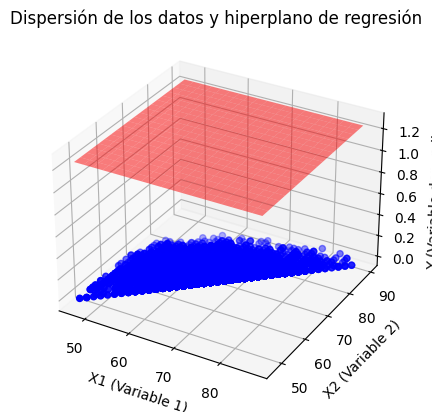

In [ ]:
def calculos_auxiliares(df):
    # Valores de X1, X2, X3 e Y
    x1 = df["overall"].sum()
    x2 = df["potential"].sum()
    x3 = df["skill_moves"].sum()
    y = df["value_eur"].sum()

    # Longitud de la tabla
    n = len(df)

    # Sumatorias necesarias
    sumX1X2 = (df["overall"] * df["potential"]).sum()
    sumX1X3 = (df["overall"] * df["skill_moves"]).sum()
    sumX2X3 = (df["potential"] * df["skill_moves"]).sum()
    sumX1Y = (df["overall"] * df["value_eur"]).sum()
    sumX2Y = (df["potential"] * df["value_eur"]).sum()
    sumX3Y = (df["skill_moves"] * df["value_eur"]).sum()
    sumX1_2 = (df["overall"] ** 2).sum()
    sumX2_2 = (df["potential"] ** 2).sum()
    sumX3_2 = (df["skill_moves"] ** 2).sum()

    # Construcción de las matrices para los cálculos
    X = np.column_stack((np.ones(n), df["overall"], df["potential"], df["skill_moves"]))
    Y = df["value_eur"]

    # Cálculo de los coeficientes B0, B1, B2, B3 usando la fórmula de regresión múltiple
    B = np.linalg.inv(X.T @ X) @ X.T @ Y

    B0 = B[0]  # Ordenada al origen
    B1 = B[1]  # Coeficiente de x1
    B2 = B[2]  # Coeficiente de x2
    B3 = B[3]  # Coeficiente de x3

    # Predicciones del modelo
    Y_pred = X @ B

    # Cálculo de Syy (variación total)
    Syy = ((df["value_eur"] - y / n) ** 2).sum()

    # Cálculo de Ssr (variación del residuo)
    Ssr = ((df["value_eur"] - Y_pred) ** 2).sum()

    # Cálculo de R2
    R2 = 1 - Ssr / Syy

    R2a = 1 - (1 - R2) * ((n - 3) / (n - 3 - 1))

    # Cálculo de la correlación r (para una regresión múltiple)
    r = np.sqrt(R2a)

    # Cálculo de la varianza
    o2 = Ssr / (n - 4)

    return {
        "sumX1": x1,
        "sumX2": x2,
        "sumX3": x3,
        "sumY": y,
        "sumX1_2": sumX1_2,
        "sumX2_2": sumX2_2,
        "sumX3_2": sumX3_2,
        "sumX1X2": sumX1X2,
        "sumX1X3": sumX1X3,
        "sumX2X3": sumX2X3,
        "sumX1Y": sumX1Y,
        "sumX2Y": sumX2Y,
        "sumX3Y": sumX3Y,
        "y/": y / n,
        "x1/": x1 / n,
        "x2/": x2 / n,
        "x3/": x3 / n,
        "n": n,
        "Syy": Syy,
        "Ssr": Ssr,
        "B0": B0,
        "B1": B1,
        "B2": B2,
        "B3": B3,
        "R2": R2,
        "R2a": R2a,
        "r": r,
        "o2": o2,
    }


# Grafica la dispersión de los datos en 3D (X1, X2) y su hiperplano de regresión
def grafica_dispersion(df, B0, B1, B2, B3):

    # Valores de X1, X2, X3 y Y
    x1 = df["overall"]
    x2 = df["potential"]
    y = df["value_eur"]

    # Crear figura en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Grafica de dispersión (solo para x1, x2 por simplicidad visual)
    ax.scatter(x1, x2, y, color="blue", label="Datos")

    # Crear malla de puntos para graficar el hiperplano de regresión
    x1_surf, x2_surf = np.meshgrid(
        np.linspace(x1.min(), x1.max(), 20), np.linspace(x2.min(), x2.max(), 20)
    )
    y_surf = B0 + B1 * x1_surf + B2 * x2_surf + B3 * np.mean(df["value_eur"])

    # Grafica el hiperplano de regresión
    ax.plot_surface(
        x1_surf,
        x2_surf,
        y_surf,
        color="red",
        alpha=0.5,
        label="Hiperplano de regresión",
    )

    # Configuración de la gráfica
    ax.set_xlabel("X1 (Variable 1)")
    ax.set_ylabel("X2 (Variable 2)")
    ax.set_zlabel("Y (Variable dependiente)")
    plt.title("Dispersión de los datos y hiperplano de regresión")
    plt.show()


# Ejecución
datos = calculos_auxiliares(df)
print(datos)
grafica_dispersion(df, datos["B0"], datos["B1"], datos["B2"], datos["B3"])

Implementación del descenso por gradiente

In [ ]:
# Variables independientes y dependientes
X = df['overall'].values
y = df['value_eur'].values

# Añadir término de intercepción
X = np.vstack((np.ones(X.shape[0]), X)).T

Algoritmo de descenso por gradiente

In [ ]:
def gradient_descent(X, y, alpha=0.00001, iterations=10000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)

        gradient = (1 / m) * X.T.dot(errors)
        theta -= alpha * gradient

        # Criterio de corte: detener si el costo no disminuye significativamente
        if i > 0 and np.abs(cost_history[-1] - cost_history[-2]) < 1e-6:
            print(f"Converged after {i} iterations.")
            break

    return theta, cost_history

# Ejecutar el descenso por gradiente
theta_gd, cost_history_gd = gradient_descent(X, y)

# Resultados del descenso por gradiente
print("Parámetros (descenso por gradiente):", theta_gd)
print("Últimos valores del descenso por gradiente:", cost_history_gd[-5:])

Parámetros (descenso por gradiente): [-16722.35211344  22719.07903771]
Últimos valores del descenso por gradiente: [3733217856721.5024, 3733217565503.864, 3733217274286.292, 3733216983068.784, 3733216691851.344]


In [ ]:
# Ecuaciones normales
theta_normal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Parámetros (Ecuaciones normales):", theta_normal)


Parámetros (Ecuaciones normales): [-15153844.42076279    258872.58567496]


Parámetros (Ecuaciones normales): [-15153844.42076279    258872.58567496]


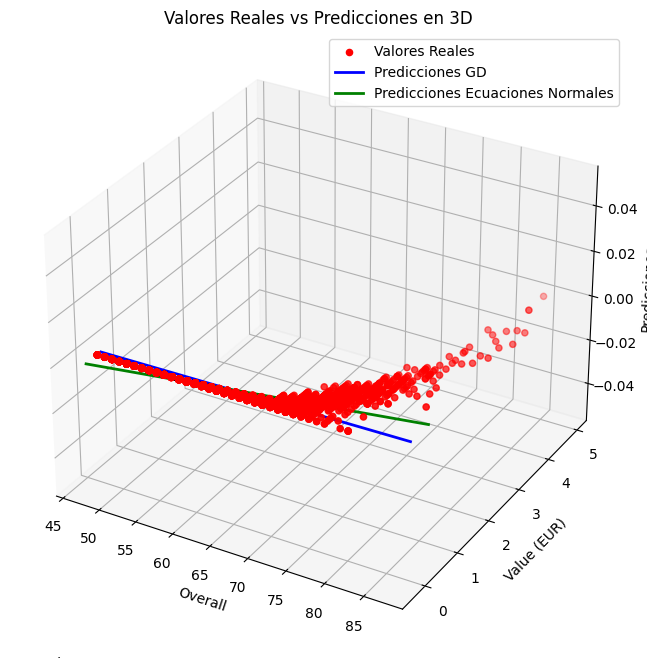

In [ ]:
# Variables independientes y dependientes
# Definir las variables
X = df['overall']
y = df['value_eur']

# Añadir término de intercepción
X = np.vstack((np.ones(X.shape[0]), X)).T

# Ecuaciones normales
theta_normal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Parámetros (Ecuaciones normales):", theta_normal)

# Graficar en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Valores reales
ax.scatter(X[:, 1], y, color='red', label='Valores Reales')

# Predicciones de GD
predictions_gd = X.dot(theta_gd)
ax.plot(X[:, 1], predictions_gd, color='blue', label='Predicciones GD', linewidth=2)

# Predicciones de Ecuaciones Normales
predictions_normal = X.dot(theta_normal)
ax.plot(X[:, 1], predictions_normal, color='green', label='Predicciones Ecuaciones Normales', linewidth=2)

# Etiquetas y título
ax.set_title('Valores Reales vs Predicciones en 3D')
ax.set_xlabel('Overall')
ax.set_ylabel('Value (EUR)')
ax.set_zlabel('Predicciones')
ax.legend()

plt.show()

El método de descenso por gradiente puede quedar atrapado en un mínimo local dependiendo del punto inicial.

Ejemplo: función de Rosenbrock

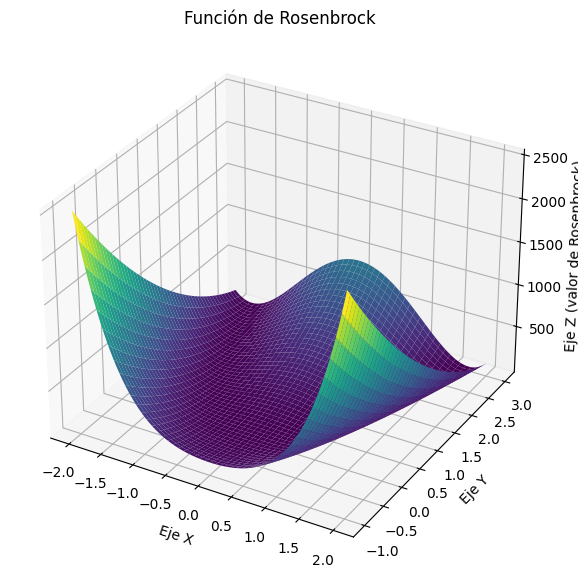

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función de Rosenbrock
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Crear una malla de valores x y y
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

# Calcular los valores de la función de Rosenbrock
Z = rosenbrock([X, Y])

# Graficar
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('Función de Rosenbrock')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z (valor de Rosenbrock)')
plt.show()